In [2]:
#import packages
import pandas as pd
import csv
import os
import numpy as np
import matplotlib.pyplot as plt
import geopandas
#import matplotlib_venn
#from matplotlib_venn import venn2
#from matplotlib import rc

In [3]:
#read csv file
datafile = "north_america_bear_killings.csv"
#import csv file into df 
bear_data= pd.read_csv(datafile)
bear_data.head()

,Name,age,gender,Date,Month,Year,Type,Location,Description,Type of bear,Hunter,Grizzly,Hikers,Only one killed
0,Mary Porterfield,3,female,5/19/1901,5,1901,Wild,"Job, West Virginia",The children were gathering flowers near their...,Black bear,0,0,0,0
1,Wilie Porterfield,5,male,5/19/1901,5,1901,Wild,"Job, West Virginia",The children were gathering flowers near their...,Black bear,0,0,0,0
2,Henry Porterfield,7,male,5/19/1901,5,1901,Wild,"Job, West Virginia",The children were gathering flowers near their...,Black bear,0,0,0,0
3,John Dicht,18,male,11/24/1906,11,1906,Wild,"Elk County, Pennsylvania","Thinking the bear was dead, Dicht began skinni...",Black bear,0,0,0,1
4,Baby Laird,1,NaN,10/5/1908,10,1908,Captive,"Tucson, Arizona",After a bear escaped from a cage at Elysian Gr...,Black bear,0,0,0,1


In [6]:
### 1. WHO DIES FROM BEARS?#####
# find the gender distribution of victims 
bear_killings = bear_data.drop(["Date", "Month", "Year", "Location", "Description", "Type of bear", "Grizzly", "Only one killed"], axis=1)
bear_killing_df = bear_killings.drop(["Type", "Name"], axis=1)
bear_killing_df["age_bins"] = pd.cut(x=bear_killing_df["age"], bins = [0, 19, 39, 59, 79, 99])
bear_killing_df["age_range"] = pd.cut(x=bear_killing_df["age"], bins = [0, 19, 39, 59, 79, 99], labels = ["Child", "Young Adult", "Adult", "Senior", "Elderly"])
bear_killing_df.head()

KeyError: 'age'

In [4]:
# find the age demographics of victims
gender = bear_killing_df.groupby("gender")
female = gender.get_group("female").count()
female_count = female["gender"]
male = gender.get_group("male").count()
male_count = male["gender"]
hunters = bear_killing_df.groupby("Hunter")
hunter = hunters.get_group(int(1)).count()
dead_hunters = hunter["Hunter"]
hikers = bear_killing_df.groupby("Hikers")
hiker = hikers.get_group(int(1)).count()
dead_hikers = hiker["Hikers"]
female_df = gender.get_group("female")
female_hunters = female_df.groupby("Hunter")
female_hunter = female_hunters.get_group(int(1)).count()
dead_female_hunters = female_hunter["Hunter"]
male_df = gender.get_group("male")
male_hunters = male_df.groupby("Hunter")
male_hunter = male_hunters.get_group(int(1)).count()
dead_male_hunters = male_hunter["Hunter"]
male_hikers = male_df.groupby("Hikers")
male_hiker = male_hikers.get_group(int(1)).count()
dead_male_hikers = male_hiker["Hikers"]
female_hikers = female_df.groupby("Hikers")
female_hiker = female_hikers.get_group(int(1)).count()
dead_female_hikers = female_hiker["Hikers"]
age_range = bear_killing_df.groupby("age_range")
children = age_range.get_group("Child").count()
children_count = children["age_range"]
young_adult = age_range.get_group("Young Adult").count()
young_adult_count = young_adult["age_range"]
adult = age_range.get_group("Adult").count()
adult_count = adult["age_range"]
senior = age_range.get_group("Senior").count()
senior_count = senior["age_range"]
elderly = age_range.get_group("Elderly").count()
elderly_count = elderly["age_range"]
children_df = age_range.get_group("Child")
child_gender = children_df.groupby("gender")
young_adult_df = age_range.get_group("Young Adult")
young_adult_gender = young_adult_df.groupby("gender")
adult_df = age_range.get_group("Adult")
adult_gender = adult_df.groupby("gender")
senior_df = age_range.get_group("Senior")
senior_gender = senior_df.groupby("gender")
elderly_df = age_range.get_group("Elderly")
elderly_gender = elderly_df.groupby("gender")
child_female = child_gender.get_group("female").count()
child_female_count = child_female["gender"]
child_male = child_gender.get_group("male").count()
child_male_count = child_male["gender"]
young_adult_male = young_adult_gender.get_group("male").count()
young_adult_male_count = young_adult_male["gender"]
young_adult_female = young_adult_gender.get_group("female").count()
young_adult_female_count = young_adult_female["gender"]
adult_male = adult_gender.get_group("male").count()
adult_male_count = adult_male["gender"]
adult_female = adult_gender.get_group("female").count()
adult_female_count = adult_female["gender"]
senior_male = senior_gender.get_group("male").count()
senior_male_count = senior_male["gender"]
senior_female = senior_gender.get_group("female").count()
senior_female_count = senior_female["gender"]
elderly_female = elderly_gender.get_group("female").count()
elderly_female_count = elderly_female["gender"]

In [ ]:
rc('font', weight='bold')

bars1 = [25, 37, 43, 17, 0]
bars2 = [16, 17, 4, 6, 1]
 
bars = np.add(bars1, bars2).tolist()
 
r = [0,1,2,3,4]
 
names = ['Child','Young Adult','Adult','Senior','Elderly']
barWidth = 1
 
plt.bar(r, bars1, color='blue', edgecolor='white', width=barWidth)

plt.bar(r, bars2, bottom=bars1, color='red', edgecolor='white', width=barWidth)

plt.xticks(r, names, fontweight='bold')
plt.xlabel("group")

plt.show()
plt.savefig("Graphs/AgeGroup.png")

In [ ]:
labels = "The Rest", "Hunters", "Hikers"
sizes = [144, 16,6]
explode = (0, 0, 0)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels,
        shadow=True, startangle=90)
ax1.axis('equal') 

plt.show()
plt.savefig("Graphs/ActivityPie.png")

In [ ]:
labels = "Men", "Women"
sizes = [73.5, 26.5]
explode = (0.1, 0,)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 

plt.show()
plt.savefig("Graphs/GenderPie.png")

In [ ]:
labels = "Children", "Young Adults", "Adults", "Seniors", "Elderly"
sizes = [41, 54, 47, 23, 1]
explode = (0, 0 , 0, 0, 0)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels,autopct = "",
        shadow=True, startangle=90)
ax1.axis('equal') 

plt.show()
plt.savefig("Graphs/AgeGroupPie.png")

In [ ]:
df = pd.DataFrame({'Male':[25, 37, 43, 17, 0], 'Female':[16, 17, 4, 6, 1]}, index=["Children", "Young Adults", "Adults", "Seniors", "Elderly"] )
 
df.plot(kind = "pie", subplots=True, figsize=(16,8))
plt.show()
plt.savefig("Graphs/GenderAgeBin.png")

         Total Count Percentage
Type                           
Captive           28     16.87%
Wild             138     83.13%


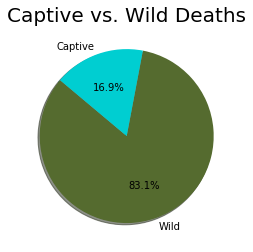

In [5]:
### 2. HOW DID THEY DIE? 
# Captive/Wild distribution visualization
typedemo = bear_data.groupby(["Type"]).count()
typedf = typedemo["Name"]
typedf = pd.DataFrame(typedf)
typedf = typedf.rename(columns = {"Name": "Total Count"})
typedf

# Percentage
typedf["Percentage"] = typedf["Total Count"]/typedf["Total Count"].sum()
typedf["Percentage"] = typedf["Percentage"].map("{:,.2%}".format)
#Display Summary Table
print(typedf)

#Pie Chart of Type 
# Generate a pie plot showing the distribution of Captive versus Wild mice using pyplot
typedeath = ["Wild", "Captive"]
deathpoints = []
counttypelist = bear_data["Type"].value_counts()
for x in counttypelist:
    deathpoints.append(x)   
colors = ["darkolivegreen","darkturquoise"]

# Tell matplotlib to create a pie chart based upon the above data
plt.pie(deathpoints, labels=typedeath, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Captive vs. Wild Deaths", size = 20)
plt.savefig("Graphs/CaptiveWild.png")
plt.show()

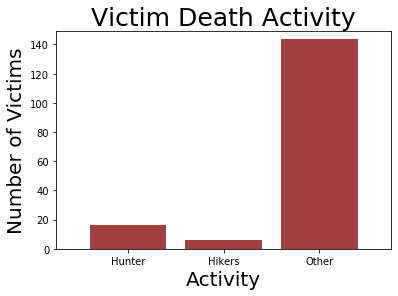

In [6]:
# distribution of hikers/hikers/other
# distribution of hikers/hikers/other
#count Hunter col
hunter= bear_data["Hunter"].sum()
# count Hiker col
hiker = bear_data["Hikers"].sum()
totalcount = bear_data["Name"].count()
other = totalcount - hiker - hunter


victim_acts = ["Hunter", "Hikers", "Other"]
data_points = [hunter, hiker, other]

plt.title("Victim Death Activity", size = 25)
plt.xlabel("Activity", size = 20)
plt.ylabel("Number of Victims", size = 20)

plt.xlim(-0.75, len(victim_acts)-.25)
plt.ylim(0, max(data_points) + 5)

plt.bar(victim_acts, data_points, facecolor="maroon", alpha=0.75, align="center")
plt.savefig("Graphs/DeathActivity.png")
plt.show()

                      Total Count
Type of bear                     
Black bear                     76
Brown Bear                     53
Grizzly (Brown) Bear           27
Polar Bear                     10


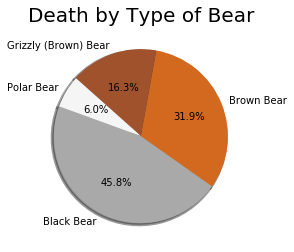

In [7]:
# type of bear
#count Grizzly col
grizzly = bear_data["Grizzly"].sum()
beardemo = bear_data.groupby(["Type of bear"]).count()
beardemo = beardemo["Name"]
beardf = pd.DataFrame(beardemo)
beardf = beardf.rename(columns = {"Name": "Total Count"})
#adding Grizzly data count to dataframe
new_row = pd.Series(data={"Total Count":grizzly}, name="Grizzly (Brown) Bear")
beardf2 = beardf.append(new_row, ignore_index=False)
#subtracting grizzly count from Brown bear (since it's a sub category)
brownbear = int(beardf2.loc["Brown bear"]) - grizzly
brownbear = pd.Series(data={"Total Count":brownbear}, name="Brown Bear")

#add adj brown bear data back into df and drop original row
beardf2 = beardf2.append(brownbear, ignore_index=False)
beardf2 = beardf2.drop('Brown bear', axis=0)
#sort by count
beardf2 = beardf2.sort_values(by='Total Count', ascending=0)
print(beardf2)

#append list for counts by bear type
totalcountlist = []
for x in beardf2["Total Count"]:
    totalcountlist.append(x)
    
    
beardeath = ["Black Bear", "Brown Bear", "Grizzly (Brown) Bear", "Polar Bear"]
deathpoints2 = totalcountlist
    
colors2 = ["darkgray","chocolate", "sienna", "whitesmoke"]

# Tell matplotlib to create a pie chart based upon the above data
plt.pie(deathpoints2, labels=beardeath, colors=colors2,
        autopct="%1.1f%%", shadow=True, startangle=160, wedgeprops = {'linewidth': 3})
plt.title("Death by Type of Bear", size = 20)

plt.savefig("Graphs/TypeofBear.png")
plt.show()

In [8]:
### 3. Have killings decreased over time? 
# Linear timeline of killings
year_count = bear_data.groupby(["Year"])["Name"].count().reset_index(name="Death Count")
death_count_year_df = pd.DataFrame(year_count)
death_count_year_df

,Year,Death Count
0,1901,3
1,1906,1
2,1908,1
3,1916,1
4,1922,1
...,...,...
70,2014,5
71,2015,2
72,2016,1
73,2017,2


In [9]:
#years list
death_year_list  = death_count_year_df["Year"].tolist()
x_axis = death_year_list
#death count list
death_count_list = death_count_year_df["Death Count"].tolist()
y_axis = death_count_list

In [10]:
print(len(x_axis))

75


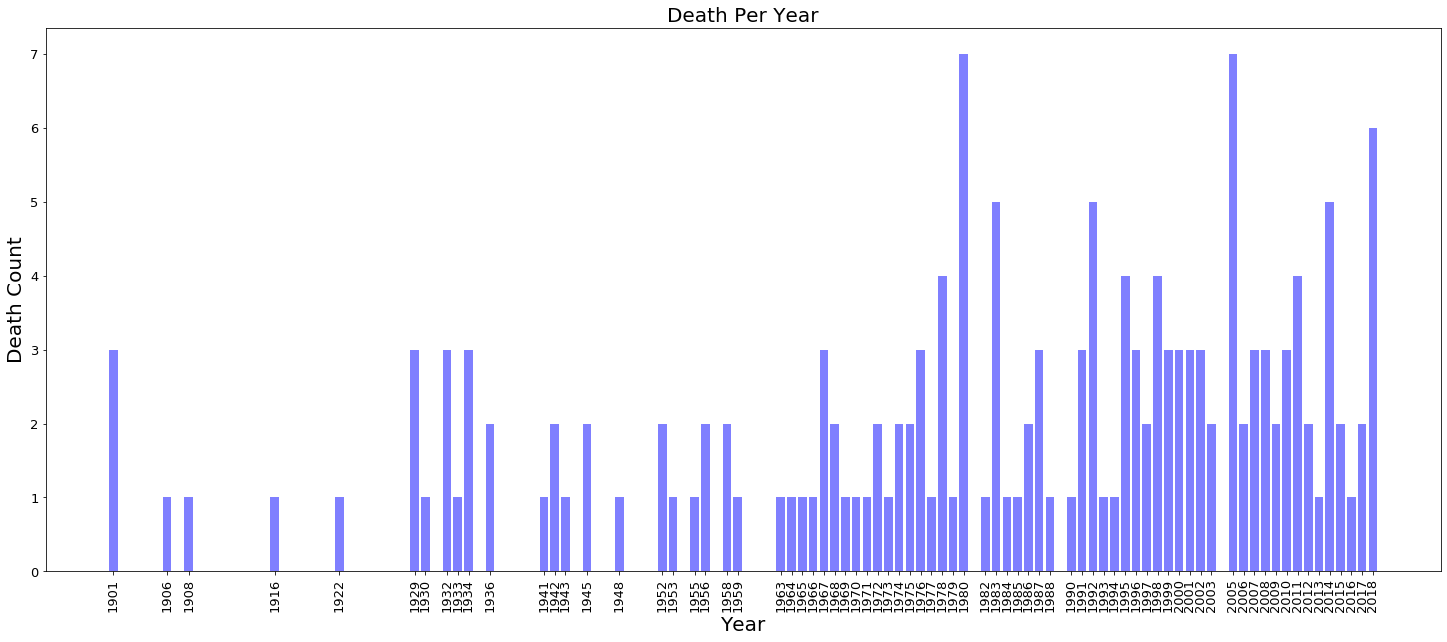

In [11]:
plt.figure(figsize=(25,10))
plt.bar(x_axis, y_axis, color = "b", alpha= 0.5, align = 'center')
plt.xticks(x_axis, rotation="vertical", fontsize = 13)
plt.yticks(fontsize = 13)
plt.xlabel("Year", fontsize = 20)
plt.ylabel("Death Count", fontsize = 20)
plt.title("Death Per Year", fontsize = 20)


plt.savefig("Graphs/Death Per Year.png")
plt.show()

In [12]:
# why are there more deaths past 1960 besides just number of people
#captive
last_year = death_count_year_df.iloc[-1,0]
first_year = death_count_year_df.iloc[0,0]
overall_average = (last_year-first_year)/(death_count_year_df["Death Count"].sum())
overall_average

0.7048192771084337

In [13]:
#max
max_death =  death_count_year_df["Death Count"].max()
max_death

7

In [14]:
year_max = death_count_year_df.loc[death_count_year_df["Death Count"]== max_death, "Year"]
year_max

39    1980
61    2005
Name: Year, dtype: int64

In [15]:
month_count = bear_data.groupby(["Month"])["Name"].count().reset_index(name="Month Death Count")
month_list = month_count["Month"].tolist()
month_death_count = month_count["Month Death Count"].tolist()
print(month_death_count)

[3, 1, 1, 4, 18, 20, 27, 28, 25, 25, 12, 2]


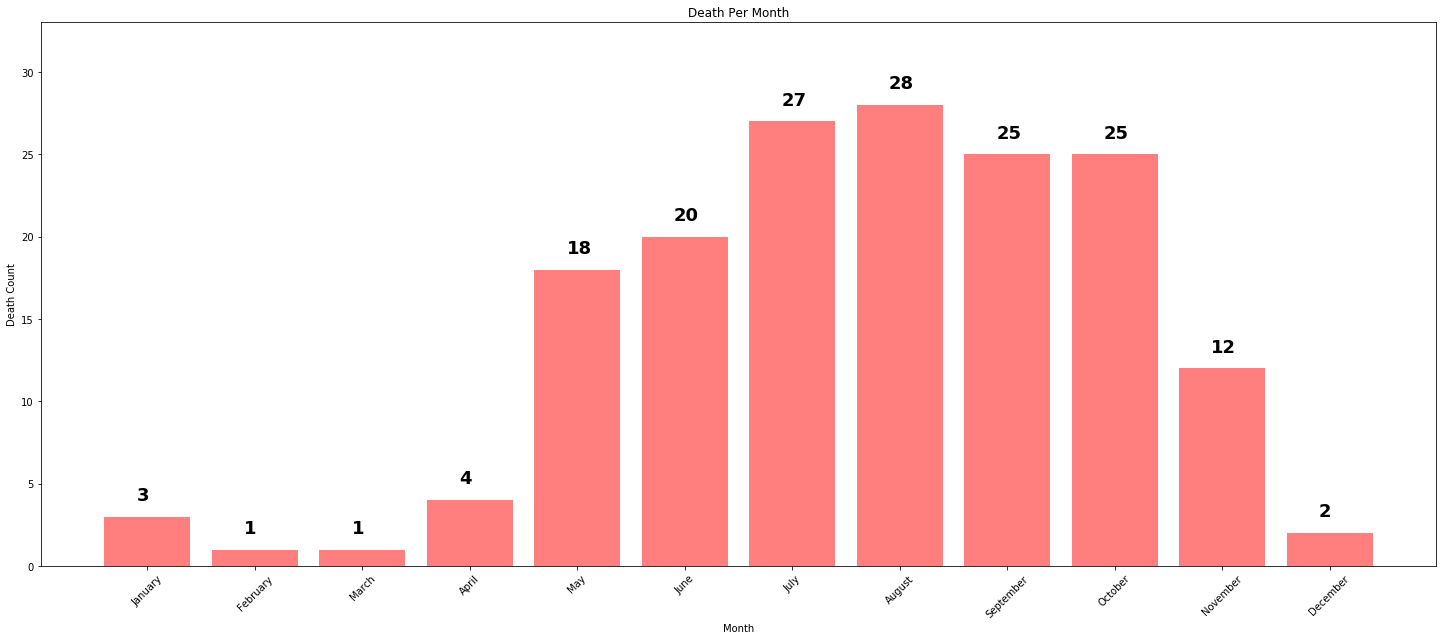

In [16]:
month_list = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
x_axis = month_list
y_axis = month_death_count


plt.figure(figsize=(25,10))
plt.bar(x_axis, y_axis, color = "red", alpha= 0.5, align = "center")
plt.xticks(month_list, rotation = "45")
plt.xlabel("Month")
plt.ylabel("Death Count")
plt.title("Death Per Month")
plt.ylim(0, 33)
for i, v in enumerate(y_axis):
    plt.text(i-.1, v+1, str(v), color = 'black', fontweight= 'bold', fontsize = 18)
plt.savefig("Graphs/Death Per Month.png")
plt.show()

In [17]:
# is there a cyclical trend/linear regresssion
type_bear_data_df = bear_data.groupby(["Year","Type"])["Name"].count().reset_index(name="death count")
type_bear_data_df

,Year,Type,death count
0,1901,Wild,3
1,1906,Wild,1
2,1908,Captive,1
3,1916,Wild,1
4,1922,Wild,1
...,...,...,...
82,2014,Wild,5
83,2015,Wild,2
84,2016,Wild,1
85,2017,Wild,2


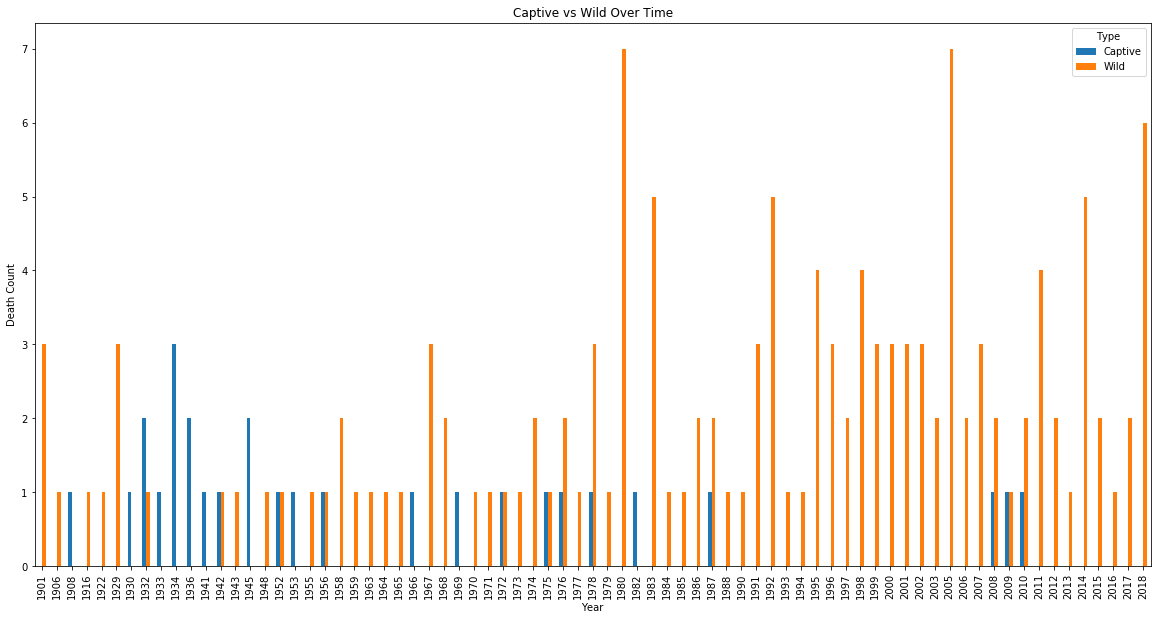

In [18]:
fig, ax = plt.subplots(figsize=(20,10))
bear_data.groupby(["Year","Type"])["Name"].count().unstack().plot.bar(ax=ax)
plt.xlabel("Year")
plt.ylabel("Death Count")
plt.title("Captive vs Wild Over Time")
plt.savefig("Graphs/Captive V Wild Over Time")
plt.show()

In [19]:
bear_data["Type"].value_counts()

Wild       138
Captive     28
Name: Type, dtype: int64

In [20]:
### 4. WHERE DO THEY OCCUR? 
# Locations (map view)
Killings_Location = bear_data.groupby(['Location'])
Total_Killings_at_Location = Killings_Location['Location'].count()

Killings_Location_df = pd.DataFrame(
    {"Killings per Location" : Total_Killings_at_Location,
    "Type of Bear" : Killings_Location['Type of bear'].unique()})

Killings_Location_df = Killings_Location_df.sort_values('Killings per Location', ascending=False).reset_index()

Killings_Location_df

,Location,Killings per Location,Type of Bear
0,"Glacier National Park, Montana",10,[Brown bear]
1,"Yellowstone National Park, Wyoming",7,[Brown bear]
2,"Algonquin Provincial Park, Ontario",5,[Black bear]
3,"near Anchorage, Alaska",3,"[Black bear, Brown bear]"
4,"Job, West Virginia",3,[Black bear]
...,...,...,...
127,"Great Smoky Mountains National Park, Tennessee",1,[Black bear]
128,"Glenwood, Washington",1,[Black bear]
129,"Glennallen, Alaska",1,[Black bear]
130,"Glacier National Park of Canada, British Columbia",1,[Brown bear]


In [21]:
# Remove projects that made no money at all
reduced_killings_df = Killings_Location_df.loc[(
    Killings_Location_df["Killings per Location"] >= 2)]
reduced_killings_df.head()

,Location,Killings per Location,Type of Bear
0,"Glacier National Park, Montana",10,[Brown bear]
1,"Yellowstone National Park, Wyoming",7,[Brown bear]
2,"Algonquin Provincial Park, Ontario",5,[Black bear]
3,"near Anchorage, Alaska",3,"[Black bear, Brown bear]"
4,"Job, West Virginia",3,[Black bear]


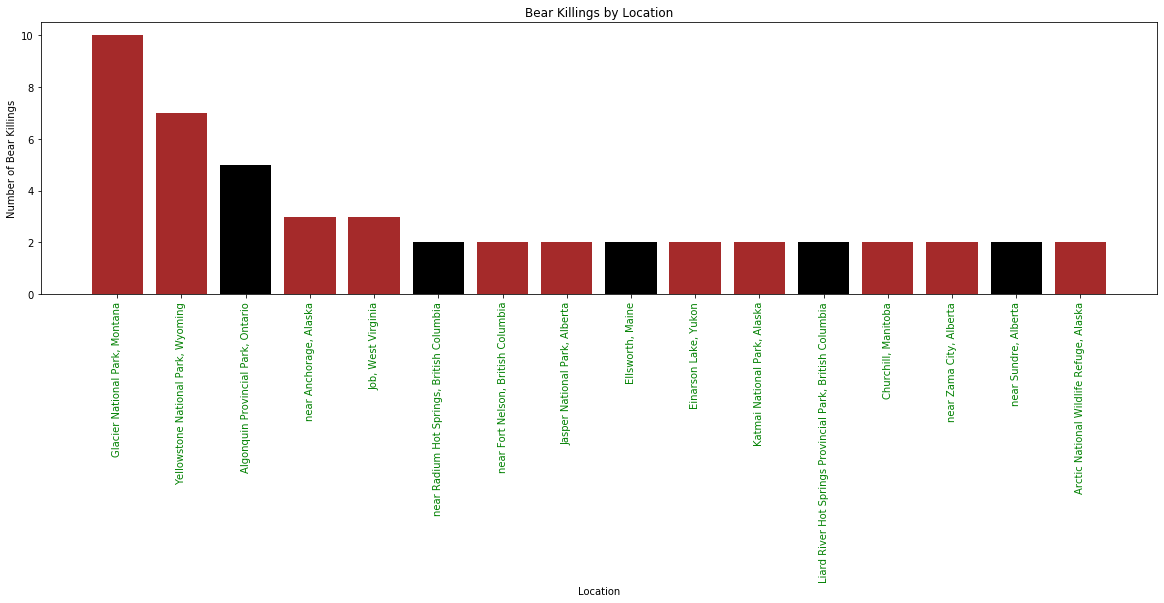

In [22]:
# Set x axis and tick locations
x_axis = reduced_killings_df['Location']
tick_locations = [name for name in x_axis]

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(20,5))
plt.bar(x_axis, reduced_killings_df['Killings per Location'], color=('brown', 'brown', 'k'), alpha=1, align="center", width=0.8)
plt.xticks(tick_locations, reduced_killings_df['Location'], rotation="vertical", color='green')
plt.title("Bear Killings by Location")
plt.xlabel("Location")
plt.ylabel("Number of Bear Killings")
plt.rcParams.update({'font.size': 18})

# Save an image of the chart and print it to the screen
plt.savefig("Graphs/BearKillingLocation.png")
plt.show()

In [23]:
#BELOW LIST OF LAT AND LNG FROM ParkCoordinates jupytyer notebook ###
Lat = [48.7596128, 44.427963, 45.8371591, 61.2180556, 38.8642774, 50.6200385, 58.8050174, 52.873383, 44.5434095, 63.9232557, 58.6125631, 59.4256421, 58.7684112, 59.1523474, 51.7970759, 68.4313695]
Lng = [-113.7870225, -110.588455, -78.3791239, -149.9002778, -79.5569984, -116.0733586, -122.697236, -117.9542938, -68.4194641, -131.605785, -155.0631051, -126.1007951, -94.16496400000001, -118.692777, -114.6393903, -143.6909925]

killings_map_df = reduced_killings_df.assign(Lat = [48.7596128, 44.427963, 45.8371591, 61.2180556, 38.8642774, 50.6200385, 58.8050174, 52.873383, 44.5434095, 63.9232557, 58.6125631, 59.4256421, 58.7684112, 59.1523474, 51.7970759, 68.4313695], Lng = [-113.7870225, -110.588455, -78.3791239, -149.9002778, -79.5569984, -116.0733586, -122.697236, -117.9542938, -68.4194641, -131.605785, -155.0631051, -126.1007951, -94.16496400000001, -118.692777, -114.6393903, -143.6909925])

killings_map_df

,Location,Killings per Location,Type of Bear,Lat,Lng
0,"Glacier National Park, Montana",10,[Brown bear],48.759613,-113.787023
1,"Yellowstone National Park, Wyoming",7,[Brown bear],44.427963,-110.588455
2,"Algonquin Provincial Park, Ontario",5,[Black bear],45.837159,-78.379124
3,"near Anchorage, Alaska",3,"[Black bear, Brown bear]",61.218056,-149.900278
4,"Job, West Virginia",3,[Black bear],38.864277,-79.556998
5,"near Radium Hot Springs, British Columbia",2,[Brown bear],50.620038,-116.073359
6,"near Fort Nelson, British Columbia",2,[Black bear],58.805017,-122.697236
7,"Jasper National Park, Alberta",2,"[Brown bear, Black bear]",52.873383,-117.954294
8,"Ellsworth, Maine",2,[Black bear],44.543410,-68.419464
9,"Einarson Lake, Yukon",2,[Brown bear],63.923256,-131.605785


In [24]:
gdf = geopandas.GeoDataFrame(
    killings_map_df, geometry=geopandas.points_from_xy(killings_map_df.Lng, killings_map_df.Lat))

gdf.head()

,Location,Killings per Location,Type of Bear,Lat,Lng,geometry
0,"Glacier National Park, Montana",10,[Brown bear],48.759613,-113.787023,POINT (-113.78702 48.75961)
1,"Yellowstone National Park, Wyoming",7,[Brown bear],44.427963,-110.588455,POINT (-110.58845 44.42796)
2,"Algonquin Provincial Park, Ontario",5,[Black bear],45.837159,-78.379124,POINT (-78.37912 45.83716)
3,"near Anchorage, Alaska",3,"[Black bear, Brown bear]",61.218056,-149.900278,POINT (-149.90028 61.21806)
4,"Job, West Virginia",3,[Black bear],38.864277,-79.556998,POINT (-79.55700 38.86428)


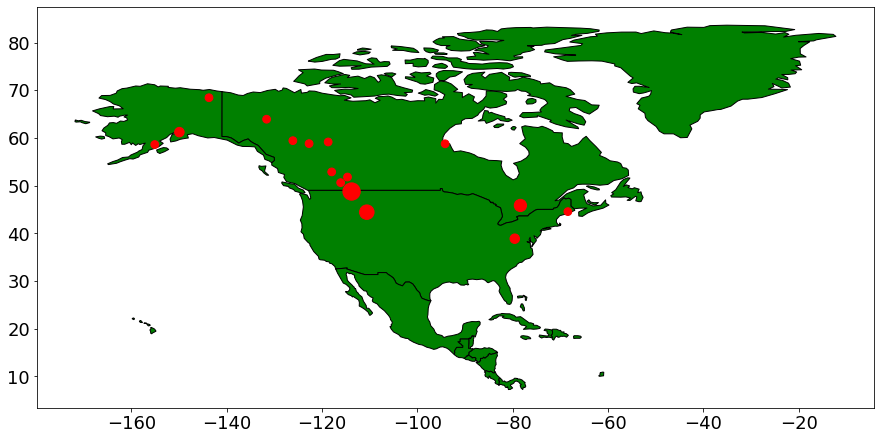

In [25]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# We restrict to South America.
ax = world[world.continent == 'North America'].plot(
    color='green', edgecolor='black', figsize=(15, 9))

# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax, color='red', markersize=gdf['Killings per Location']*30)

plt.savefig("Graphs/BearKillingsMap.png")

plt.show()